In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

In [7]:
data.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### Preparing the dataset

Use only the following columns:

    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'

In [16]:
columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

df = data[columns]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


### EDA

Look at the fuel_efficiency_mpg variable. Does it have a long tail?

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

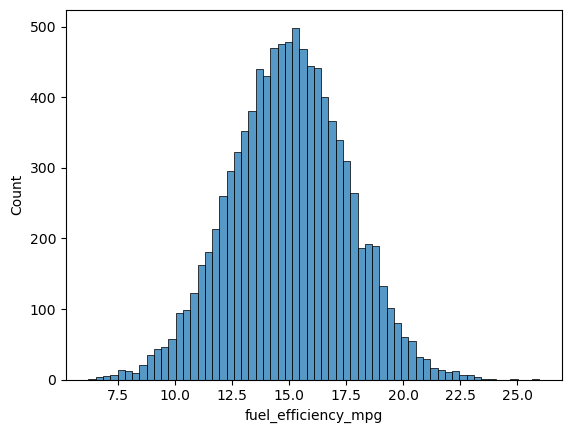

In [28]:
sns.histplot(df["fuel_efficiency_mpg"])

No, it does not have a long tail.

### Q1. There's one column with missing values. What is it?

In [33]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

A1: horsepower

### Q2. What's the median (50% percentile) for variable 'horsepower'?

In [56]:
df.horsepower.median()

149.0

### Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [72]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [74]:
n, n_val + n_test + n_train

(9704, 9704)

In [76]:
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

In [78]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [80]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [82]:
df_train.reset_index(drop = True, inplace = True)
df_val.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

In [84]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [113]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [115]:
y_train

array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
       18.92574819, 17.96528447])

In [117]:
del df_train["fuel_efficiency_mpg"]
del df_val["fuel_efficiency_mpg"]
del df_test["fuel_efficiency_mpg"]

### Q3. 
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [129]:
mean_horsepower = df_train["horsepower"].mean()

In [131]:
np.sort(df["model_year"].unique())

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023], dtype=int64)

In [172]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight']

def prepare_X(df, i):
    df = df.copy()
    df["age"] = 2023 - df["model_year"]
    features = base + ["age"]
    return df[features].fillna(i).values

In [174]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [176]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y-y_pred)**2))

In [178]:
# Option 1: Fillna with 0
X_train_opt1 = prepare_X(df_train, 0)
w0_opt1, w_opt1 = train_linear_regression(X_train_opt1, y_train)

X_val_opt1 = prepare_X(df_val, 0)
y_pred_opt1 = w0_opt1 + X_val_opt1.dot(w_opt1)
score_opt1 = rmse(y_val, y_pred_opt1)
print(score_opt1)

0.517378263884094


In [180]:
# Option 2: Fillna with mean
X_train_opt2 = prepare_X(df_train, mean_horsepower)
w0_opt2, w_opt2 = train_linear_regression(X_train_opt2, y_train)

X_val_opt2 = prepare_X(df_val, mean_horsepower)
y_pred_opt2 = w0_opt2 + X_val_opt2.dot(w_opt2)
score_opt2 = rmse(y_val, y_pred_opt2)
print(score_opt2)

0.46359650423334664


A3: Option **with mean** gives better RMSE since it has a lower RMSE than that of option with 0

### Q4. 
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 1, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?


In [182]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [192]:
for r in [0, 0.01, 1, 10, 100]:
    X_train = prepare_X(df_train,0)
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    
    X_val = prepare_X(df_val,0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, score)

0 0.517378263884094
0.01 0.5173748966572388
1 0.5187375615521667
10 0.6407574659640622
100 2.058982175918172


A4: **0.01** gives the best RMSE (0.517374...)

### Q5.
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

In [211]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

score_list = []
for seed in seeds:
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train: n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train["fuel_efficiency_mpg"]
    del df_val["fuel_efficiency_mpg"]
    del df_test["fuel_efficiency_mpg"]

    X_train = prepare_X(df_train,0)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val,0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    score_list.append(score)

In [221]:
round(np.std(score_list),3)

0.007

### Q6. 
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?


In [232]:
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

df_full_train = pd.concat([df_train, df_val])
df_full_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
9066,240,136.0,4050.512290,2006,10.304700
3073,190,141.0,3195.866942,2017,13.479434
2476,200,184.0,3006.164370,2017,16.190653
658,200,NaN,2947.143980,2022,15.446503
954,250,132.0,3114.371978,2001,14.472172
...,...,...,...,...,...
8083,200,167.0,3470.715658,2003,12.850141
6182,180,144.0,3605.310144,2016,11.681418
3886,180,154.0,3346.965671,2018,13.678140
6735,210,152.0,2500.175687,2020,17.593237


In [234]:
df_full_train.reset_index(drop=True, inplace=True)
df_full_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,240,136.0,4050.512290,2006,10.304700
1,190,141.0,3195.866942,2017,13.479434
2,200,184.0,3006.164370,2017,16.190653
3,200,NaN,2947.143980,2022,15.446503
4,250,132.0,3114.371978,2001,14.472172


In [238]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([10.30469994, 13.47943378, 16.19065297, ..., 13.67814034,
       17.59323665, 16.06897494])

In [240]:
X_full_train = prepare_X(df_full_train,0)
w0, w = train_linear_regression(X_full_train, y_full_train)
    
X_test = prepare_X(df_test,0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(score)

0.5156132022010643
